In [1]:
library(Seurat)
library(ggplot2)
library(RColorBrewer)

Attaching SeuratObject



In [6]:
set_epi = readRDS('../Ana_int/RDS/int_set/int_epithelial.rds')

In [42]:
colnames(set_epi@meta.data)

[1] "orig.ident"                                
 [2] "nCount_RNA"                                
 [3] "nFeature_RNA"                              
 [4] "S.Score"                                   
 [5] "G2M.Score"                                 
 [6] "Phase"                                     
 [7] "old.ident"                                 
 [8] "seurat_clusters"                           
 [9] "QC_ncount"                                 
[10] "QC_nfeature"                               
[11] "log10GenesPerUMI"                          
[12] "QC_log10GenesPerUMI"                       
[13] "percent.mt"                                
[14] "QC_percent.mt"                             
[15] "scDblFinder_score"                         
[16] "scDblFinder_class"                         
[17] "QC_scDblFinder"                            
[18] "to_discard"                                
[19] "tnt"                                       
[20] "Sting_status"                              
[21] "group"                                     
[22] "integrated_snn_res.0.1"                    
[23] "integrated_snn_res.0.2"                    
[24] "integrated_snn_res.0.4"                    
[25] "integrated_snn_res.0.6"                    
[26] "integrated_snn_res.0.8"                    
[27] "HALLMARK_ANGIOGENESIS"                     
[28] "HALLMARK_APOPTOSIS"                        
[29] "HALLMARK_COMPLEMENT"                       
[30] "HALLMARK_DNA_REPAIR"                       
[31] "HALLMARK_E2F_TARGETS"                      
[32] "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
[33] "HALLMARK_G2M_CHECKPOINT"                   
[34] "HALLMARK_HEDGEHOG_SIGNALING"               
[35] "HALLMARK_IL2_STAT5_SIGNALING"              
[36] "HALLMARK_IL6_JAK_STAT3_SIGNALING"          
[37] "HALLMARK_INFLAMMATORY_RESPONSE"            
[38] "HALLMARK_INTERFERON_ALPHA_RESPONSE"        
[39] "HALLMARK_INTERFERON_GAMMA_RESPONSE"        
[40] "HALLMARK_MITOTIC_SPINDLE"                  
[41] "HALLMARK_NOTCH_SIGNALING"                  
[42] "HALLMARK_PI3K_AKT_MTOR_SIGNALING"          
[43] "HALLMARK_PROTEIN_SECRETION"                
[44] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"          
[45] "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"        
[46] "HALLMARK_WNT_BETA_CATENIN_SIGNALING"       
[47] "sig_3SRP"                                  
[48] "sig_3SRP1"                                 
[49] "score_pseudobulk_3srp"

création d'une fonction plot spécifique pseudobulk <br>

<i> décomposition par étapes :</i>

In [4]:
# coordonnées UMAP:
coord_umap = set_epi@reductions$umap@cell.embeddings
coord_umap = as.data.frame(coord_umap)
dim(coord_umap)

[1] 34498     2

In [5]:
# ajout des numéros de cluster
coord_umap$cluster = as.numeric(levels(set_epi$integrated_snn_res.0.4))[set_epi$integrated_snn_res.0.4]
unique(coord_umap$cluster)

[1]  4  1  0  3  2  5  7  6  9  8 10

In [6]:
coord_umap$score = set_epi$score_pseudobulk_3srp
head(coord_umap)

,UMAP_1,UMAP_2,cluster,score
,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGAGCAGAA-1_1,-2.4746624,-2.4125541,4,0.9082826
AAACCCAAGTCATACC-1_1,5.9666003,0.6526471,1,0.5160250
AAACCCACAAGGCGTA-1_1,-1.9719296,-1.1139775,0,0.9467677
AAACCCATCTTGAACG-1_1,-0.2812853,-3.5066250,4,0.9082826
AAACGAACAGCAGTTT-1_1,-4.1943556,-0.8060441,3,0.5823144
AAACGAATCCATGAGT-1_1,1.8283701,0.5371137,3,0.5823144


gestion des couleurs

In [11]:
# création fonction ramp_palette 
palette_purd = brewer.pal(9, "PuRd")
ramp_palette = colorRampPalette(palette_purd)
# liste des couleurs
color_score = ramp_palette(length(unique(coord_umap$score)))
# intégration du code couleur dans la df coord_umap
# coord_umap$color = c(rep(1, dim(coord_umap)[1]))

# c = 1
# for (s in sort(unique(coord_umap$score))){
#     coord_umap$color[coord_umap$score == s] = color_score[c]
#     c = c + 1
# }
# head(coord_umap)

In [9]:
saveRDS(coord_umap, "df_umap_pseudobulk.rds")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


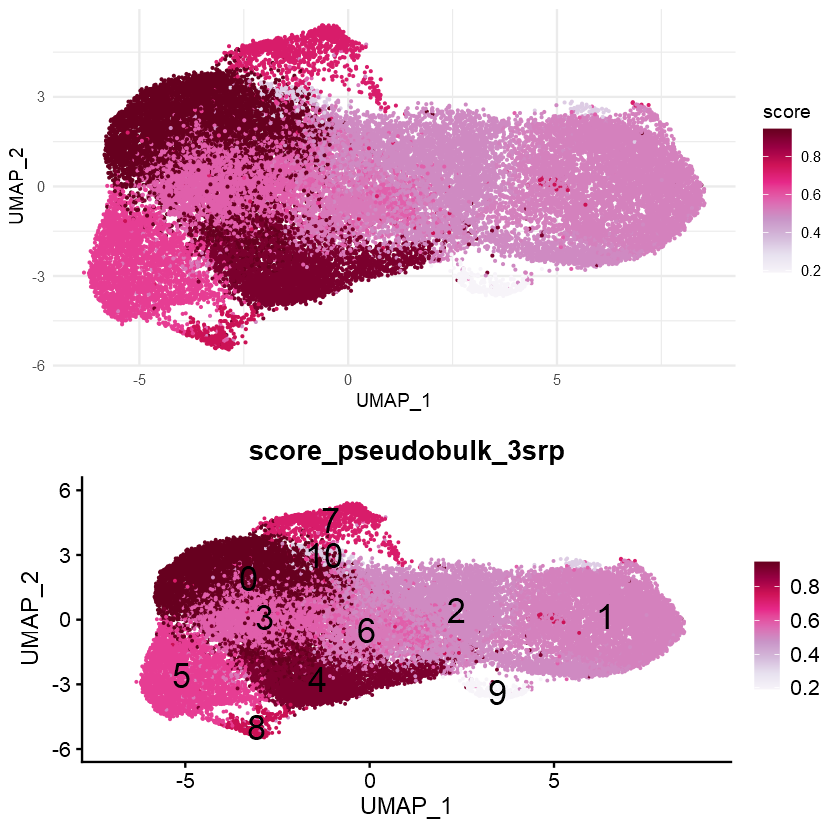

In [10]:

p1 = ggplot(coord_umap, aes(x= UMAP_1, y = UMAP_2, col = score)) + 
                geom_point(size = 0.1) + 
                scale_color_gradientn(colours = brewer.pal(n = 9, name = "PuRd" )) +
                theme_minimal()
Idents(set_epi) = "integrated_snn_res.0.4"
p2 = FeaturePlot(set_epi, features = "score_pseudobulk_3srp",
            label = TRUE, label.size = 7) + 
            scale_color_gradientn(colours = brewer.pal(n = 9, name = "PuRd" ))

cowplot::plot_grid(p1, p2, ncol = 1 )


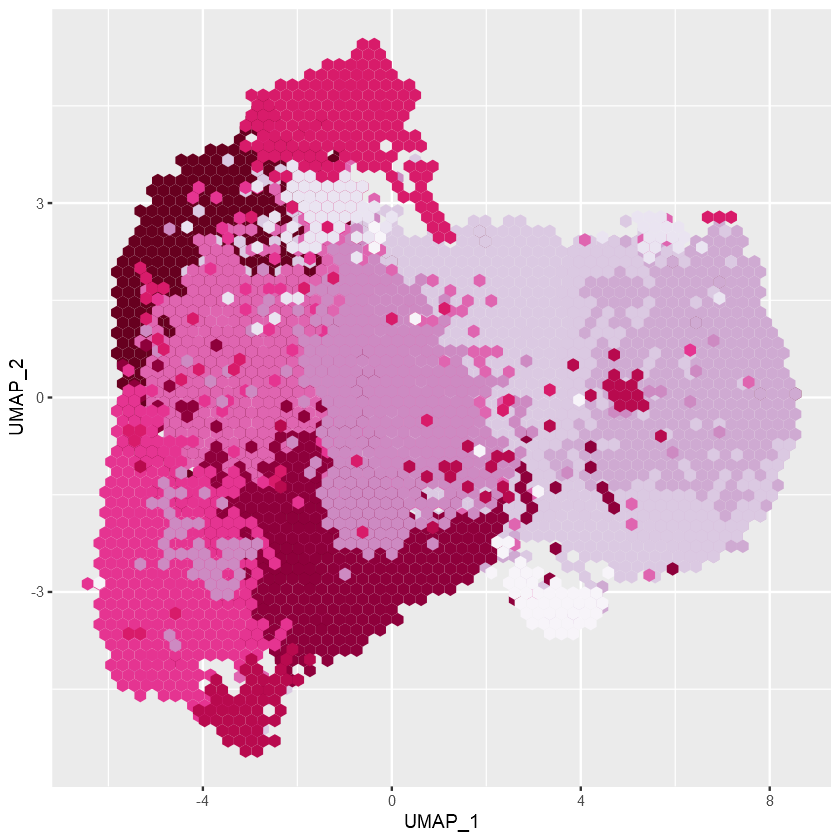

In [13]:
ggplot(coord_umap, aes(x= UMAP_1, y = UMAP_2, fill= as.factor(score) , group = as.factor(cluster))) + 
                stat_bin_hex(bins = 60) + scale_fill_manual(values = color_score) + 
                NoLegend()


représentation par conditions individualisées

In [14]:
# ajout des méta conditions à la df

coord_umap$tnt = set_epi$tnt
coord_umap$Sting_status = set_epi$Sting_status

In [16]:
saveRDS(coord_umap, "df_umap_pseudobulk.rds")

In [2]:
coord_umap = readRDS("df_umap_pseudobulk.rds")

# comparaison par condition: <br>
- nécessité de recalculer le score pseudobulk par condition individualisée (sur le cluster)
- heatmap des ratios ou des différences par cluster entre deux conditions


In [2]:
pb_nt_ctr = readRDS("set_epi_pseudobulk_NT_StCTR.rds")
pb_nt_ko = readRDS("set_epi_pseudobulk_NT_StKO.rds")
pb_tax_ctr = readRDS("set_epi_pseudobulk_TAX_StCTR.rds")
pb_tax_ko = readRDS("set_epi_pseudobulk_TAX_StKO.rds")

col_names = paste("cluster_", 0:10, sep = "")
colnames(pb_nt_ctr) = col_names
colnames(pb_nt_ko) = col_names
colnames(pb_tax_ctr) = col_names
colnames(pb_tax_ko) = col_names

In [3]:
sig_3SRP = c( "Ccl20", 
              "Cxcl1", 
              "Cxcl5", 
              "Il1a", 
              "Csf3", 
              "Spp1", 
              "Slpi", 
              "Nfkbia", 
              "Areg", 
              "Inhba")

In [4]:
source("package_pseudobulk.R")

list_pb_cond = list(pb_nt_ctr, pb_nt_ko, pb_tax_ctr, pb_tax_ko)
pb_names = c(   "pb_nt_ctr", 
                "pb_nt_ko", 
                "pb_tax_ctr", 
                "pb_tax_ko")
# liste des scores de signature 3SRP par pb_cond

list_score_pb_3SRP = lapply(list_pb_cond, function(x){
                                        s = score_pseudobulk(x, sig_3SRP)
                                        return(s)
})
names(list_score_pb_3SRP) = pb_names



intégration du score pb_3SRP dans les méta des subsets conditionnels

In [7]:
# set_epi_nt_ctr = subset(set_epi, subset = (tnt == "NT") & (Sting_status == "S+"))
# set_epi_nt_ko = subset(set_epi, subset = (tnt == "NT") & (Sting_status == "S-"))
# set_epi_tax_ctr = subset(set_epi, subset = (tnt == "Tax.") & (Sting_status == "S+"))
# set_epi_tax_ko = subset(set_epi, subset = (tnt == "Tax.") & (Sting_status == "S-"))

set_epi_nt_ctr = 
set_epi_nt_ko = 
set_epi_tax_ctr = 
set_epi_tax_ko = 

readRDS(set_epi_nt_ctr, "set_epi_NT_StCTR.rds")
readRDS(set_epi_nt_ko, "set_epi_NT_StKO.rds")
readRDS(set_epi_tax_ctr, "set_epi_TAX_StCTR.rds")
readRDS(set_epi_tax_ko, "set_epi_TAX_StKO.rds")



In [27]:
list_set_epi_cond = list(set_epi_nt_ctr, 
                        set_epi_nt_ko, 
                        set_epi_tax_ctr, 
                        set_epi_tax_ko)
                        


list_set_epi_cond = mapply(function(x, y){
                            y = ExpandScore(x, y, "integrated_snn_res.0.4", "score_pb_3SRP")
                            },
                        list_score_pb_3SRP,
                        list_set_epi_cond
                        )

In [9]:
saveRDS(set_epi_nt_ctr, "set_epi_NT_StCTR.rds")
saveRDS(set_epi_nt_ko, "set_epi_NT_StKO.rds")
saveRDS(set_epi_tax_ctr, "set_epi_TAX_StCTR.rds")
saveRDS(set_epi_tax_ko, "set_epi_TAX_StKO.rds")

In [32]:
set_names = gsub("pb_", "", pb_names) %>% stringr::str_to_upper()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


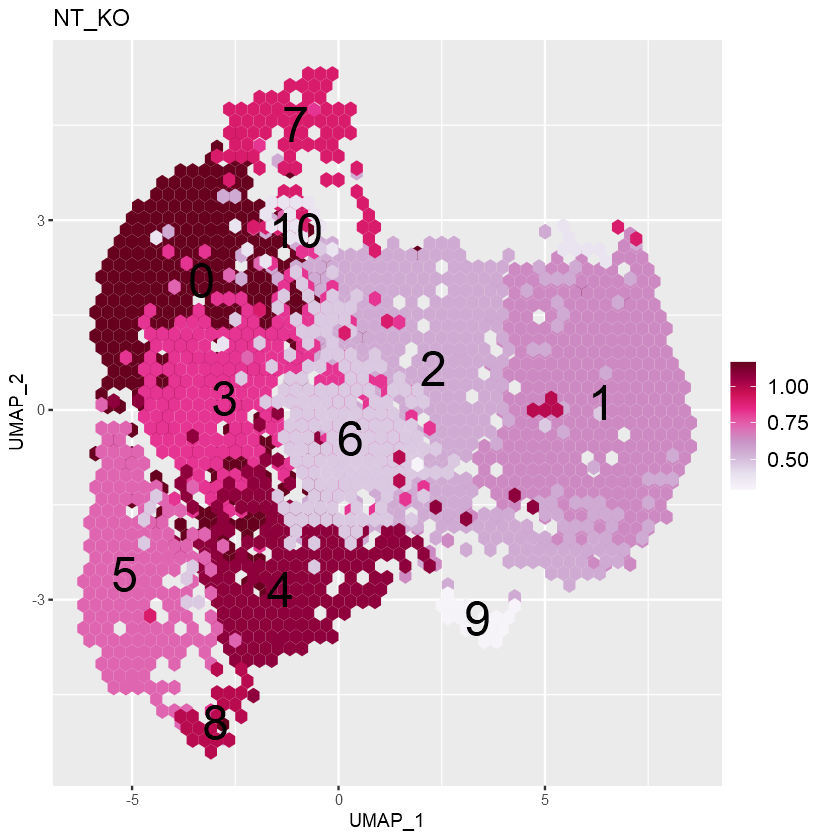

In [34]:
PlotPseudobulk(list_set_epi_cond[[2]], "integrated_snn_res.0.4", "score_pb_3SRP", title = set_names[2])


In [33]:
source("package_pseudobulk.R")

Plot des so de la liste

In [104]:
p = PlotPseudobulkFromList(list_set_epi_cond, "integrated_snn_res.0.4", "score_pb_3SRP", set_names)
pdf("test_lisplot.pdf")
p
dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

## HEATMAP

In [108]:
nt_ctr = list_set_epi_cond[[1]]
nt_ko = list_set_epi_cond[[2]]

In [134]:
sc_nt_ctr = nt_ctr@meta.data[, c("integrated_snn_res.0.4", "score_pb_3SRP")]
sc_nt_ko = nt_ko@meta.data[, c("integrated_snn_res.0.4", "score_pb_3SRP")]

In [135]:
sc_nt_ctr = sc_nt_ctr[order(sc_nt_ctr$integrated_snn_res.0.4),]
sc_nt_ko = sc_nt_ko[order(sc_nt_ko$integrated_snn_res.0.4),]

In [168]:
head(sc_nt_ctr)

,integrated_snn_res.0.4,score_pb_3SRP
,<fct>,<dbl>
AAAGGATCACGCACCA-1_7,0,1.218197
AAAGGTAAGCTCTTCC-1_7,0,1.218197
AAAGTGAAGCACCCAC-1_7,0,1.218197
AACAAAGGTTCTTAGG-1_7,0,1.218197
AACAACCGTCAGACTT-1_7,0,1.218197
AACAACCGTTGCTTGA-1_7,0,1.218197


In [151]:
df_score_nt_ctr = data.frame(unique(sc_nt_ctr$integrated_snn_res.0.4), unique(sc_nt_ctr$score_pb_3SRP))
colnames(df_score_nt_ctr) = c("cluster", "score")
df_score_nt_ko = data.frame(unique(sc_nt_ko$integrated_snn_res.0.4), unique(sc_nt_ko$score_pb_3SRP))
colnames(df_score_nt_ko) = c("cluster", "score")

In [152]:
df_score_nt_ctr

cluster,score
<fct>,<dbl>
0,1.2181966
1,0.6143033
2,0.5496917
3,0.7952374
4,0.9992047
5,0.6925673
6,0.5934109
7,0.7353193
8,0.8890633


In [166]:
diff_sc = df_score_nt_ctr$score - df_score_nt_ko$score
ratio_sc = df_score_nt_ctr$score / df_score_nt_ko$score

df =data.frame(X = c(rep("diff", 11), rep("ratio", 11)),
                Y = c(rep(paste("cluster_", 0:10), 2)),
                Z = c(diff_sc, log2(ratio_sc)))


In [160]:
df

X,Y,Z
<chr>,<chr>,<dbl>
diff,cluster_ 0,0.055501534
diff,cluster_ 1,-0.022064382
diff,cluster_ 2,-0.083062364
diff,cluster_ 3,0.007583591
diff,cluster_ 4,-0.122011405
diff,cluster_ 5,0.032916985
diff,cluster_ 6,0.034516478
diff,cluster_ 7,-0.136074411
diff,cluster_ 8,-0.018598155


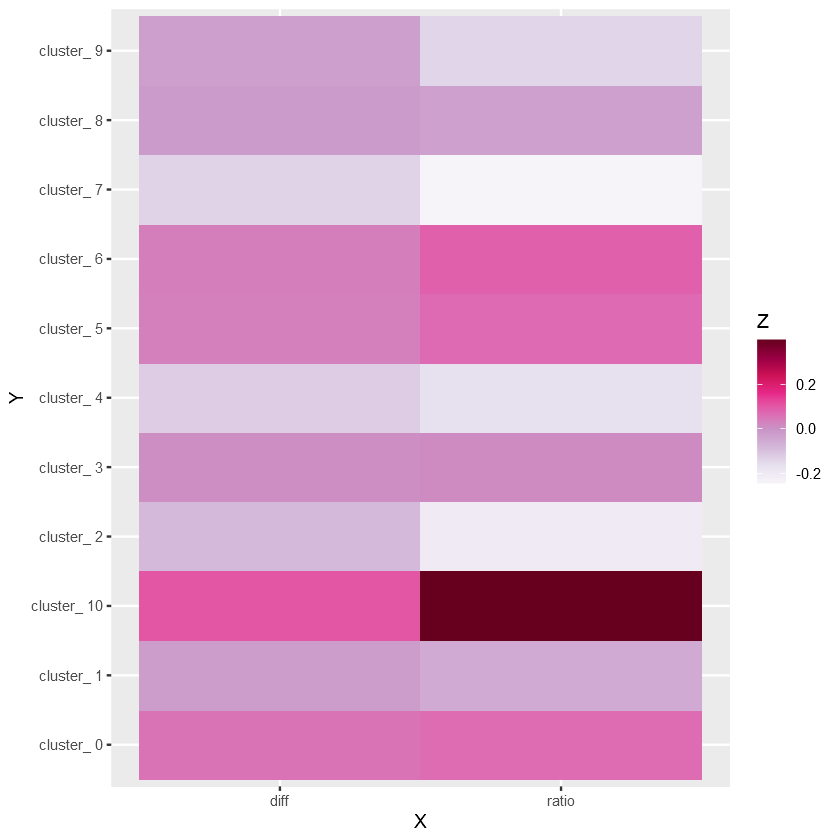

In [167]:
ggplot(df, aes(x = X, y = Y, fill = Z )) + geom_tile() + scale_fill_gradientn(colours = brewer.pal(n = 9, name = "PuRd" ))